In [ ]:
# part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
train = pd.read_csv('/content/training_set.csv')
train.head()

GRE Score  Chance of Admit
0        337             0.92
1        324             0.76
2        316             0.72
3        322             0.80
4        314             0.65

In [45]:
def predict(x,theta):
  return theta[0] + theta[1]*x

In [87]:
def mse(predicted,actual):
  return (np.sum((actual-predicted)**2))/(2*len(actual))

In [88]:
def gbd(theta,lr,epoch,x,y):
  loss=[]
  x = (x - np.mean(x))/np.std(x)
  predicted = []
  for e in range(epoch):
    predicted = predict(x,theta)
    # print(mse(predicted,y))
    loss.append(mse(predicted,y))
    theta[0] = theta[0] - lr*((np.sum(predicted - y))/len(train))
    theta[1] = theta[1] - lr*((np.sum((predicted - y)*x))/len(train))
    # print(theta)
    # if (e==50):
      # break
  return loss,theta,predicted

In [89]:
loss, theta, pred = gbd([1,1],0.01,10000,train['GRE Score'].to_numpy(),train['Chance of Admit'].to_numpy())

Text(0, 0.5, 'Loss')

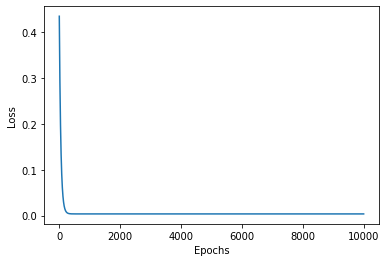

In [90]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")

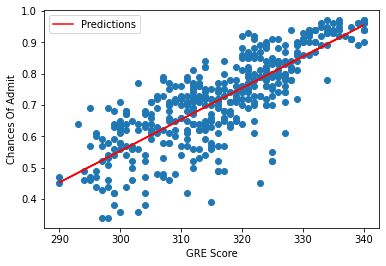

In [91]:
fig, ax=plt.subplots()
ax.plot(train['GRE Score'].to_numpy(), pred, color='red', label='Predictions')
ax.scatter(train['GRE Score'].to_numpy(), train['Chance of Admit'].to_numpy())
plt.xlabel("GRE Score")
plt.ylabel("Chances Of Admit")
ax.legend()

As GRE Score increases the chances of admission also increases. There is a positive relationship.

In [92]:
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []
for x in range(5):
  xx = train['GRE Score'].to_numpy()[x*85:(x+1)*85]
  yy = train['Chance of Admit'].to_numpy()[x*85:(x+1)*85]
  X_test_list.append(xx)
  y_test_list.append(yy)
  X_train_list.append(np.delete(train['GRE Score'].to_numpy(),[range(x*85,(x+1)*85)]))
  y_train_list.append(np.delete(train['Chance of Admit'].to_numpy(),[range(x*85,(x+1)*85)]))

In [93]:
def gbd1(theta,lr,epoch,x,y,x_t,y_t):
  loss=[]
  loss_t=[]
  x = (x - np.mean(x))/np.std(x)
  predicted = []
  for e in range(epoch):
    predicted = predict(x,theta)
    loss.append(mse(predicted,y))
    loss_t.append(mse(predict(x_t,theta),y_t))
    theta[0] = theta[0] - lr*((np.sum(predicted - y))/len(train))
    theta[1] = theta[1] - lr*((np.sum((predicted - y)*x))/len(train))
  return loss,theta,predicted, loss_t

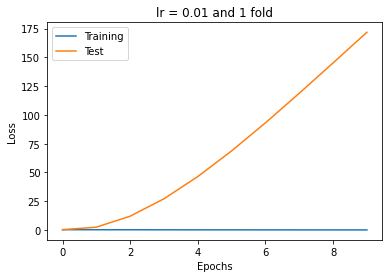

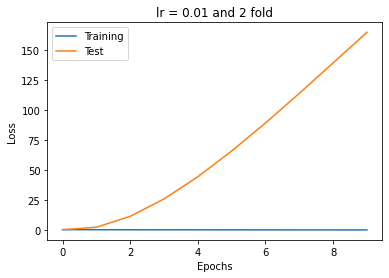

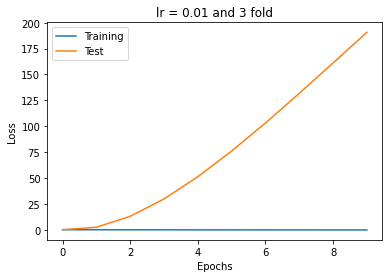

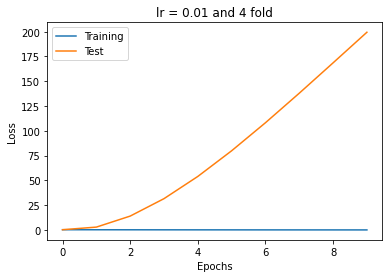

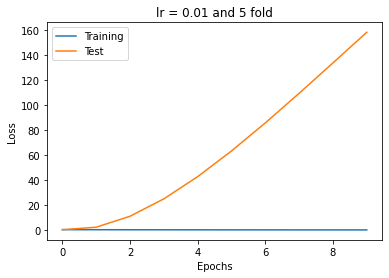

In [94]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.1,10,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

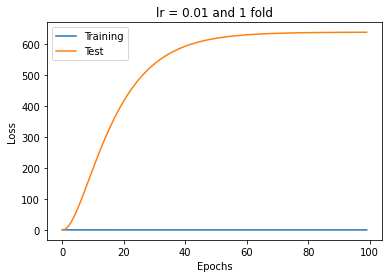

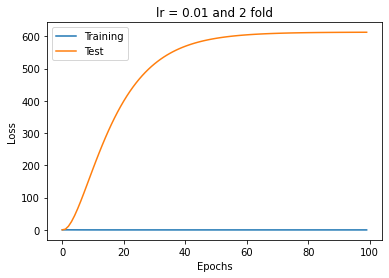

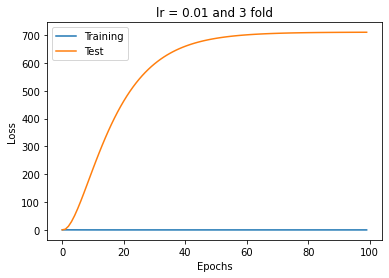

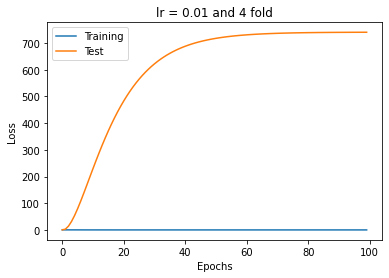

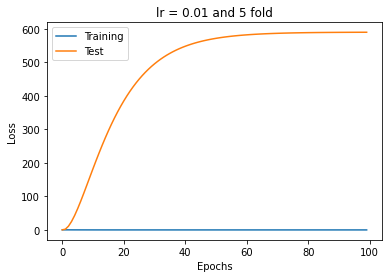

In [95]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.1,100,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training',)
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

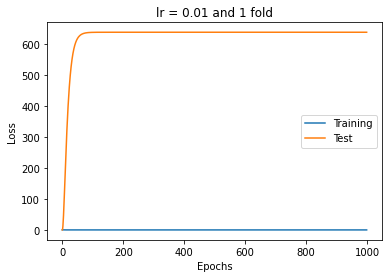

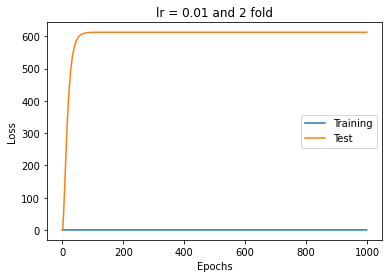

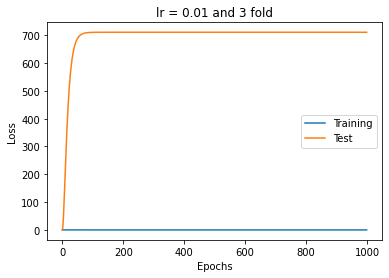

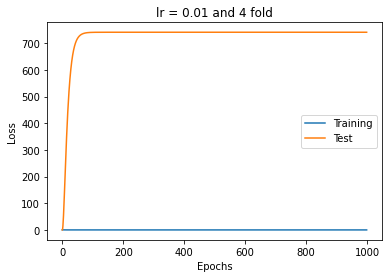

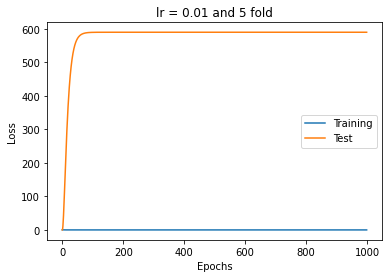

In [96]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.1,1000,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

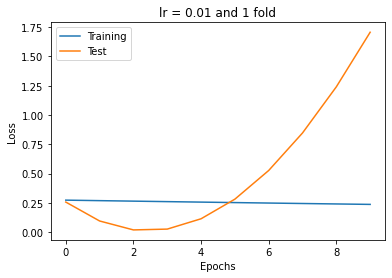

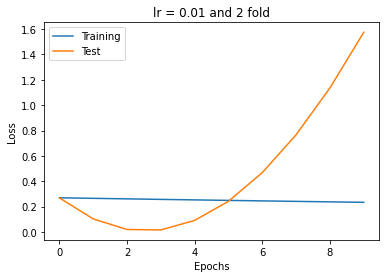

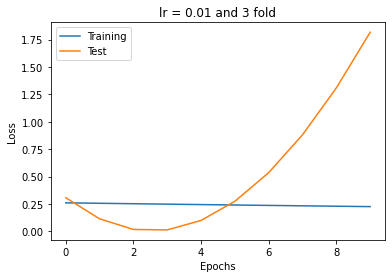

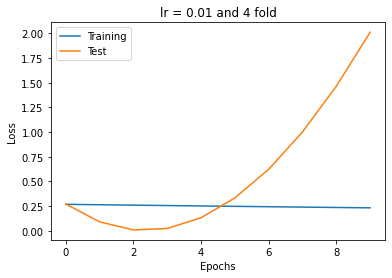

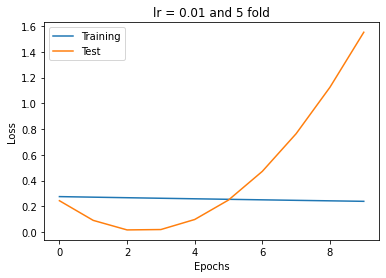

In [97]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.01,10,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

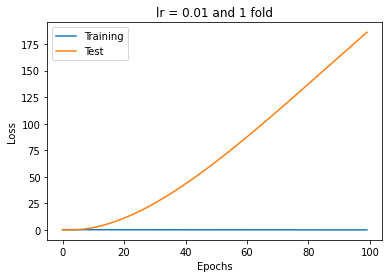

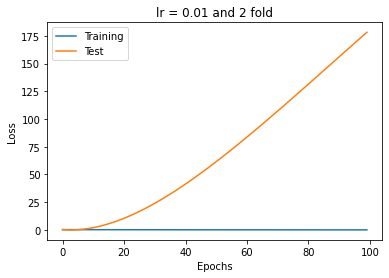

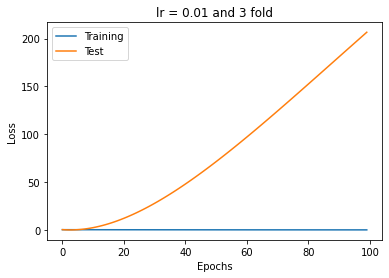

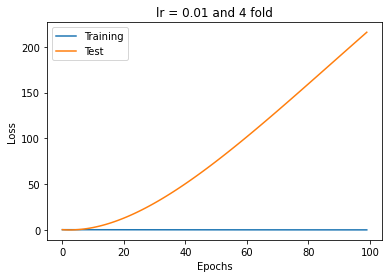

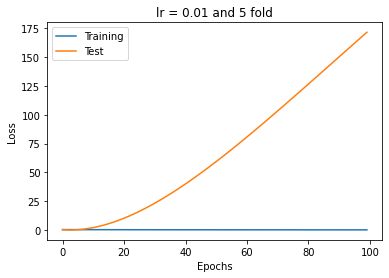

In [98]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.01,100,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

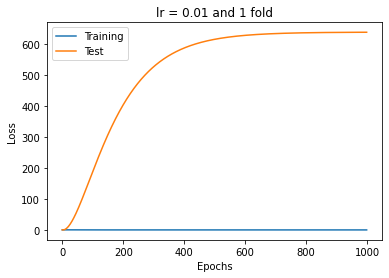

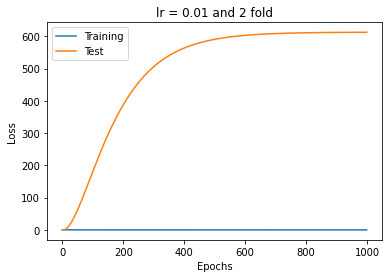

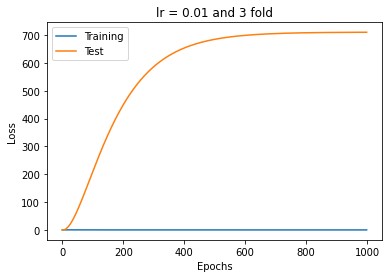

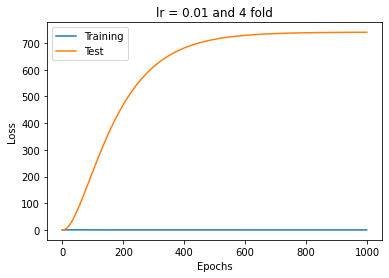

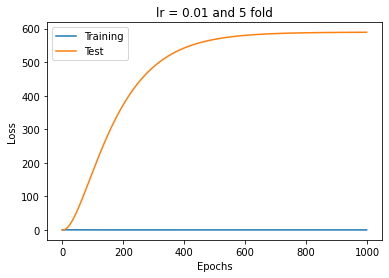

In [99]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.01,1000,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

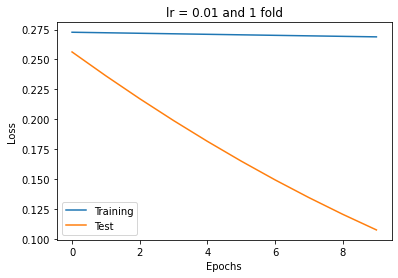

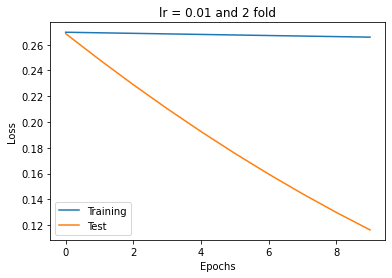

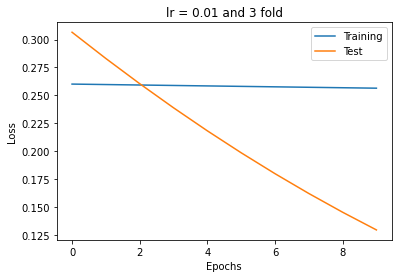

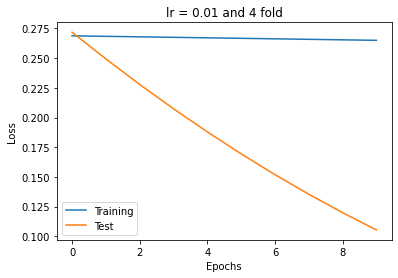

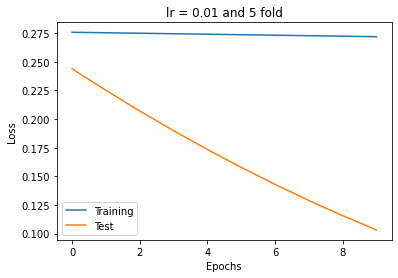

In [100]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.001,10,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

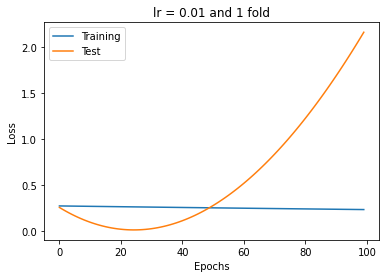

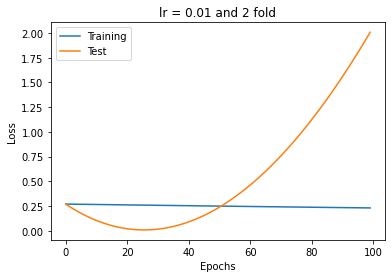

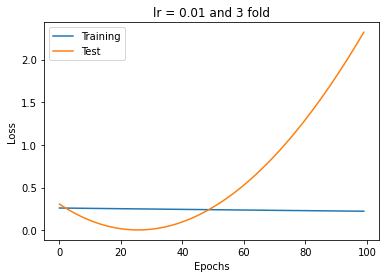

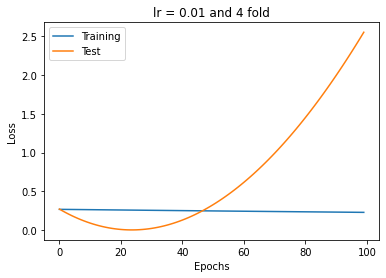

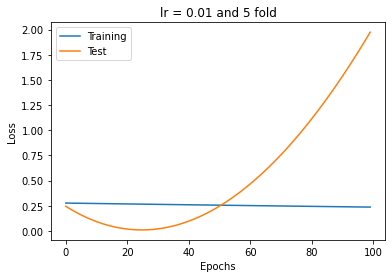

In [101]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.001,100,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

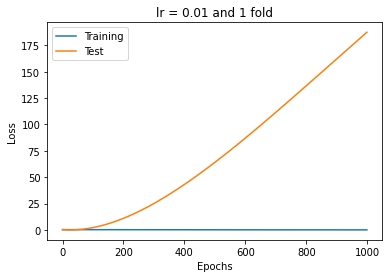

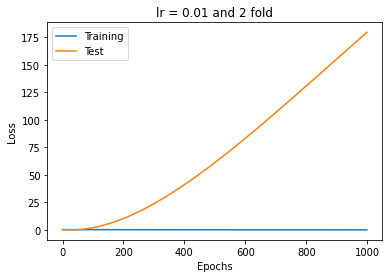

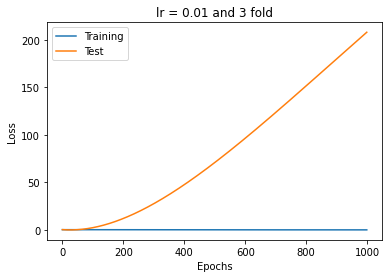

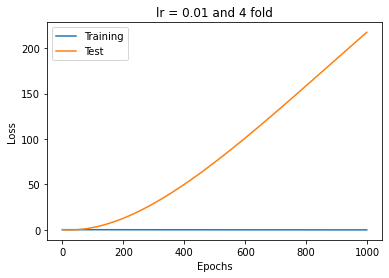

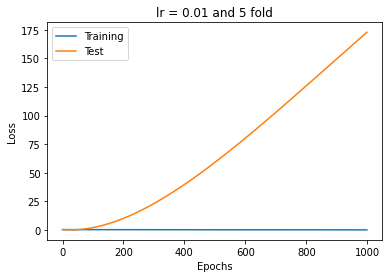

In [102]:
for x in range(5):
  loss, theta, pred, loss_t = gbd1([0.0,0.0],0.001,1000,X_train_list[x],y_train_list[x],X_test_list[x],y_test_list[x])
  fig, ax=plt.subplots()
  ax.plot(loss, label='Training')
  ax.plot(loss_t, label='Test')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('lr = 0.01'+' and '+str(x+1)+" fold" )
  ax.legend()

**Best hypermeters are lr = 0.01 and epoch = 100. This maybe because as the dataset is small and lr is high, so it doesnt need a lot of epochs to converge.**

In [ ]:
# part 2

In [3]:
train_2 = pd.read_csv('/content/training_set_2.csv')
val_2 = pd.read_csv('/content/validation_set_2.csv')
test_2 = pd.read_csv('/content/test_set_2.csv')
train_2.head()

date   location  ...  hospital_beds_per_thousand  new_deaths
0  3/20/2020       Peru  ...                         1.6         3.0
1  3/21/2020  Argentina  ...                         5.0         1.0
2  3/21/2020       Peru  ...                         1.6         2.0
3  3/22/2020  Argentina  ...                         5.0         0.0
4  3/22/2020       Peru  ...                         1.6         0.0

[5 rows x 18 columns]

In [4]:
def pearson(x,y):
  return np.abs(np.corrcoef(x,y)[0][1])
  # return np.sum(x-np.mean(x)*y-np.mean(y))/np.sqrt(np.sum(np.square(x-np.mean(x)))*np.sum(np.square(y-np.mean(y))))

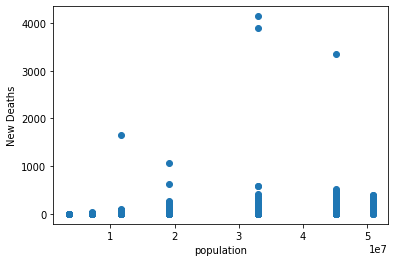

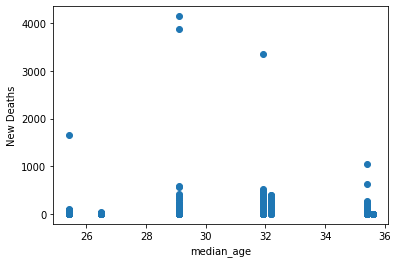

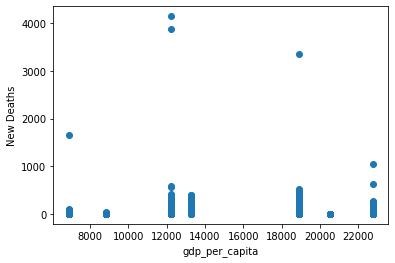

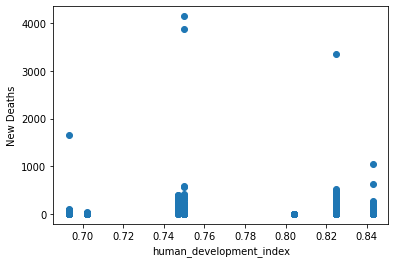

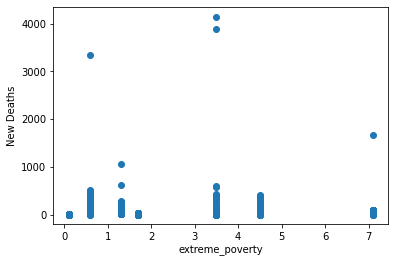

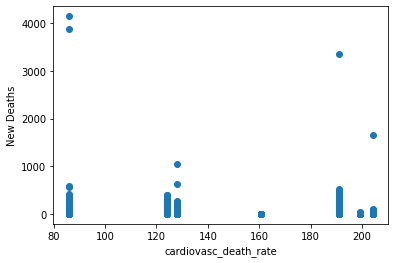

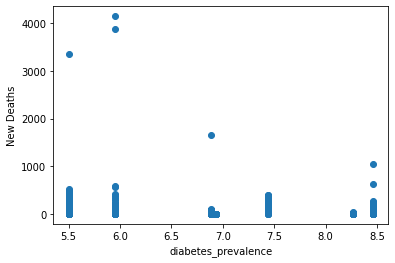

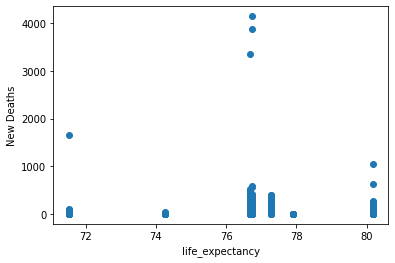

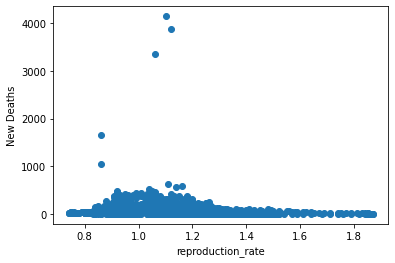

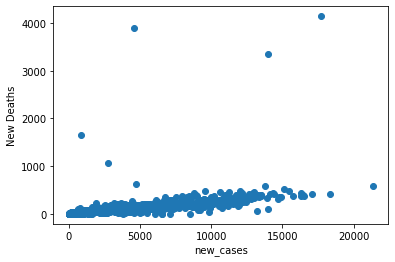

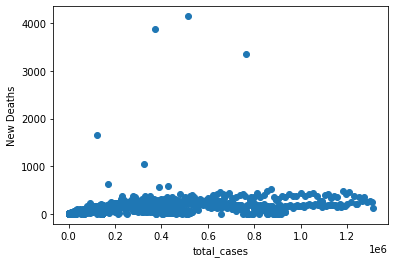

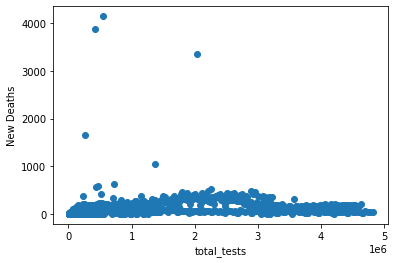

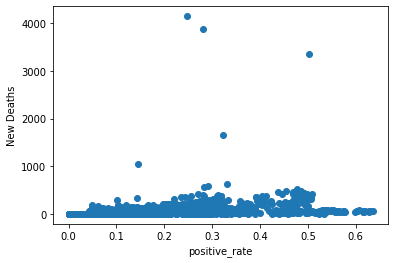

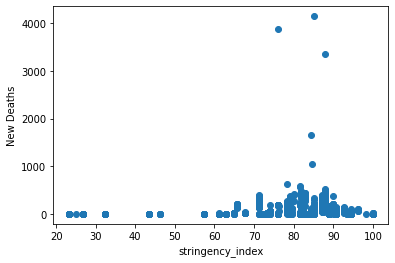

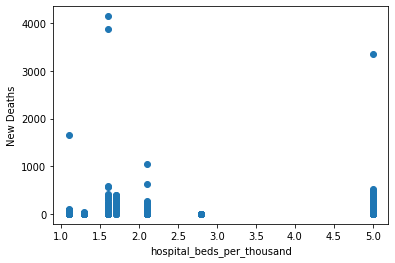

In [17]:
# pearson’s correlation coefficient
# scatter plots
ppc=[]
for x in train_2:
  if ((train_2[x].dtype != train_2.population.dtype) or x=='new_deaths'):
    continue
  plt.figure()
  plt.scatter(train_2[x].to_numpy(),train_2.new_deaths.to_numpy())
  plt.xlabel(x)
  plt.ylabel('New Deaths')
  ppc.append([x,pearson(train_2[x].to_numpy(),train_2.new_deaths.to_numpy())])
ppc.sort(key = lambda x: x[1])
ppc_n = ppc[-10:]

In [6]:
cols = [x[0] for x in ppc_n]
cols

['hospital_beds_per_thousand',
 'stringency_index',
 'reproduction_rate',
 'diabetes_prevalence',
 'cardiovasc_death_rate',
 'total_tests',
 'positive_rate',
 'population',
 'total_cases',
 'new_cases']

In [7]:
# data normalization
train_2_norm = pd.DataFrame()
val_2_norm = pd.DataFrame()
test_2_norm = pd.DataFrame()

for x in train_2:
  if ((train_2[x].dtype != train_2.population.dtype) or (x=='new_deaths') or (x not in cols)):
    continue
  xx = train_2[x].to_numpy()
  vv = val_2[x].to_numpy()
  tt = test_2[x].to_numpy()

  train_2_norm[x] = (xx - np.mean(xx))/np.std(xx)
  val_2_norm[x] = (vv - np.mean(xx))/np.std(xx)
  test_2_norm[x] = (tt - np.mean(xx))/np.std(xx)

In [8]:
test_2.head()

date   location  ...  hospital_beds_per_thousand  new_deaths
0  12/10/2020   Colombia  ...                        1.71       176.0
1  12/10/2020   Paraguay  ...                        1.30        13.0
2  12/10/2020       Peru  ...                        1.60        98.0
3  12/10/2020    Uruguay  ...                        2.80         3.0
4  12/11/2020  Argentina  ...                        5.00       175.0

[5 rows x 18 columns]

In [9]:
# MSE, Predict, BGD
def predict_2(x,theta):
  return theta[0] + theta[-10:].reshape(1,10).dot(x)

def mse_2(actual,predicted):
  return (np.sum(np.square(actual-predicted)))/(2*len(actual[0]))

def gbd_2(theta,lr,epoch,x_df,y, val_df, val_y):
  x = x_df.to_numpy().reshape(10,1500)
  v = val_df.to_numpy().reshape(10,173)
  loss=[]
  loss_v=[]
  for e in range(epoch):
    predicted = predict_2(x,theta)
    predicted_val = predict_2(v,theta)
    loss.append(mse_2(predicted,y))
    loss_v.append(mse_2(predicted_val,val_y))
    theta[0] = theta[0] - lr*((np.sum(predicted - y))/len(train_2_norm))
    for th in range(10):
      theta[th+1] = theta[th+1] - lr*((np.sum((predicted - y)*x[th]))/len(train_2_norm))
  return loss,theta,loss_v

In [10]:
loss_2, theta_2, loss_v_2 = gbd_2(np.array([1.0]*11),0.01,1000,train_2_norm,train_2.new_deaths.to_numpy(), val_2_norm, val_2.new_deaths.to_numpy())

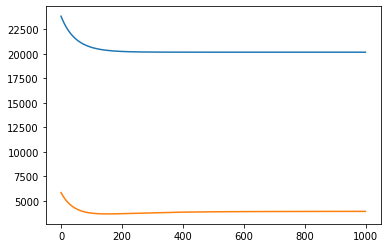

In [11]:
plt.plot(loss_2)
plt.plot(loss_v_2)

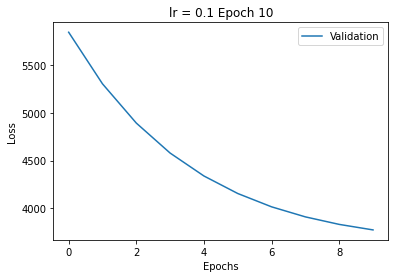

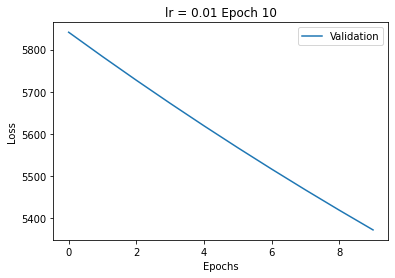

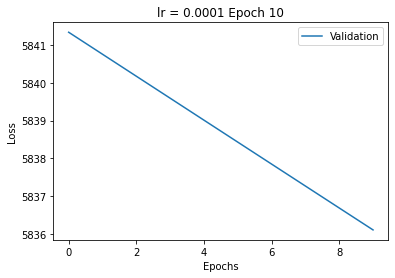

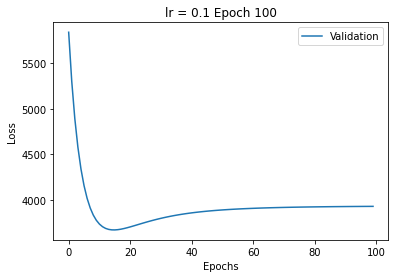

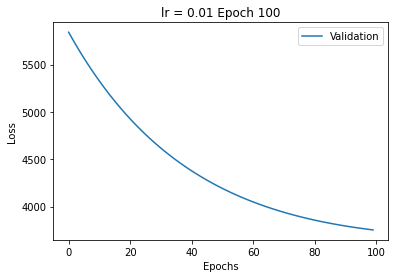

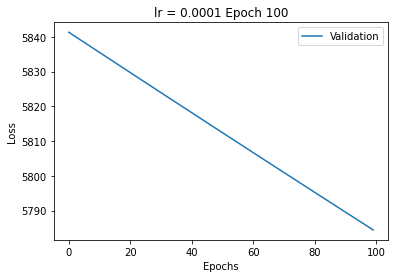

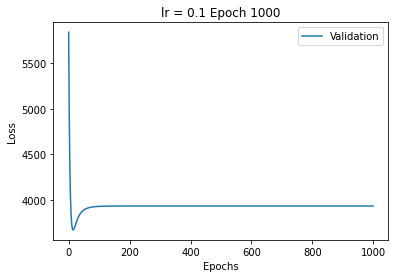

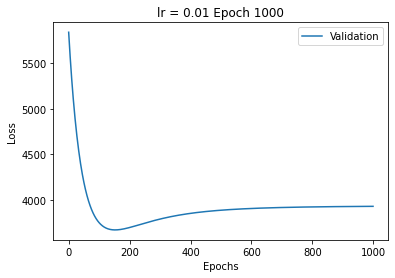

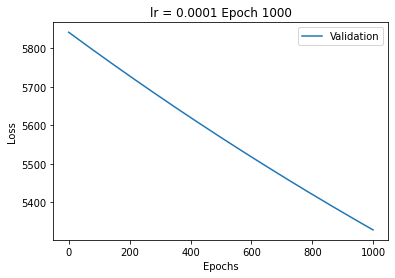

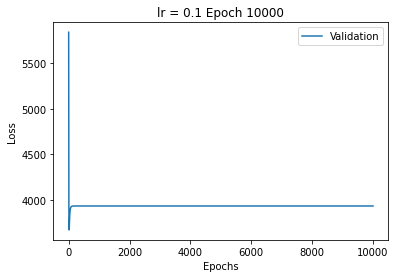

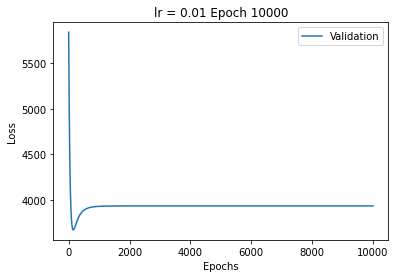

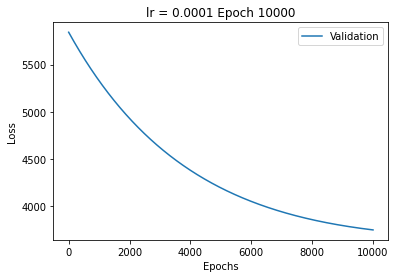

In [27]:
for e in [10,100,1000,10000]:
  for x in [0.1,0.01,0.0001]:
    loss, theta, loss_v = gbd_2(np.array([1.0]*11),x,e,train_2_norm,train_2.new_deaths.to_numpy(), val_2_norm, val_2.new_deaths.to_numpy())
    fig, ax=plt.subplots()
    # ax.plot(loss, label='Training')
    ax.plot(loss_v, label='Validation')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('lr = '+str(x) + ' Epoch '+str(e))
    ax.legend()

**Best hypermeters are lr = 0.01 and epoch = 100. This maybe because as the dataset is small and lr is high, so it doesnt need a lot of epochs to converge.**

In [14]:
# part 3

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21000354.568802238, tolerance: 6081.885885
  positive)


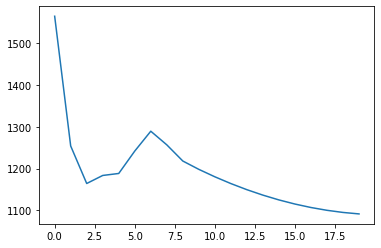

In [30]:
loss_3_lasso = []
lr = range(20)
for x in lr:
  lass = Lasso(x)
  la = lass.fit(train_2_norm.to_numpy(), train_2.new_deaths.to_numpy())
  val_predicted = lass.predict(val_2_norm.to_numpy())
  loss_3_lasso.append(mean_squared_error(val_predicted, val_2.new_deaths.to_numpy()))
plt.plot(lr,loss_3_lasso)

**Best alpha value for lasso is around 18**

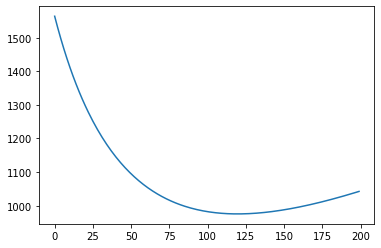

In [31]:
loss_3_ridge = []
lr = range(200)
coefs=[]
for x in lr:
  ridge = Ridge(x)
  la = ridge.fit(train_2_norm.to_numpy(), train_2.new_deaths.to_numpy())
  coefs.append(la.coef_)
  val_predicted = ridge.predict(val_2_norm.to_numpy())
  loss_3_ridge.append(mean_squared_error(val_predicted, val_2.new_deaths.to_numpy()))
plt.plot(lr,loss_3_ridge)

**Best alpha value for lasso is around 100-125**

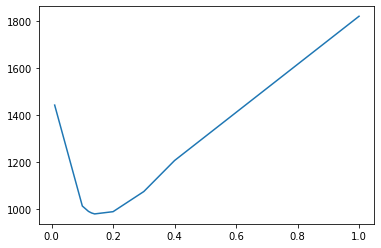

In [32]:
loss_3_elas_n = []
# lr = range(0,10)
lr = [0.01,0.1,0.12,0.13,0.14,0.2,0.3,0.4,1]
coefs2 = []
for x in lr:
  elas_n = ElasticNet(x)
  la = elas_n.fit(train_2_norm.to_numpy(), train_2.new_deaths.to_numpy())
  coefs2.append(la.coef_)
  val_predicted = elas_n.predict(val_2_norm.to_numpy())
  loss_3_elas_n.append(mean_squared_error(val_predicted, val_2.new_deaths.to_numpy()))
plt.plot(lr,loss_3_elas_n)


**Best alpha value for lasso is around 0.12**


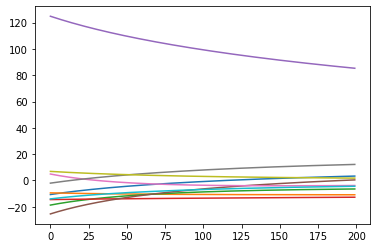

In [37]:
lr = range(200)
cc = [np.zeros(1)]*10
for z in coefs:
  for zz in range(10):
    cc[zz] = np.append(cc[zz],z[zz])
for x in range(10):
  plt.plot(lr,cc[x][1:])

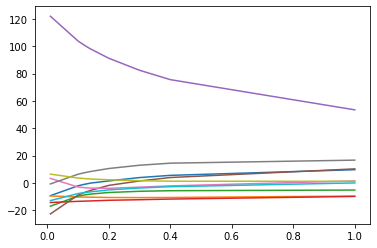

In [35]:
lr = [0.01,0.1,0.12,0.13,0.14,0.2,0.3,0.4,1]
cc2 = [np.zeros(1)]*10
for z in coefs2:
  for zz in range(10):
    cc2[zz] = np.append(cc2[zz],z[zz])
for x in range(10):
  plt.plot(lr,cc2[x][1:])

In [43]:
lass = Lasso(18)
la = lass.fit(train_2_norm.to_numpy(), train_2.new_deaths.to_numpy())
test_predicted = lass.predict(test_2_norm.to_numpy())
print('Lasso loss on test:',mean_squared_error(test_predicted, test_2.new_deaths.to_numpy()))

ri = Ridge(112)
la = ri.fit(train_2_norm.to_numpy(), train_2.new_deaths.to_numpy())
test_predicted = ri.predict(test_2_norm.to_numpy())
print('Ridge loss on test:',mean_squared_error(test_predicted, test_2.new_deaths.to_numpy()))

elas_n = ElasticNet(0.12)
la = elas_n.fit(train_2_norm.to_numpy(), train_2.new_deaths.to_numpy())
test_predicted = elas_n.predict(test_2_norm.to_numpy())
print('ElasticNet loss on test:',mean_squared_error(test_predicted, test_2.new_deaths.to_numpy()))

Lasso loss on test: 3886.3212533856304
Ridge loss on test: 2634.5062867831425
ElasticNet loss on test: 2667.4324284203017
